# Sistemas Inteligentes

## Exercício Computacional 2 - Classificação

Preencha todas as células adequadamente e responda todas as perguntas de forma completa e elaborada.

### Identificação do Aluno

#### Nome Completo

Daniel Escudero

#### RA

11005716

### Instruções

Treine e teste um classificador à sua escolha utilizando a base de dados **Olivetti Faces** (veja as referências).

Faça um caso com com *k-Fold* e um caso de forma direta, ou seja, utilizando o *train_test_split*.

Exiba a acurácia e a *Confusion Matrix*, então discuta sobre o desempenho do classificador para os dois casos.

Entre as células de códigos, insira células de tipo *Markdown* para fornecer explicações sobre os passos realizados; não insira apenas códigos "soltos" sem explicação.

Dica: desta vez, estamos lidando com uma quantidade relativamente grande de classes, então pode ser interessante exibir a *Confusion Matrix* utilizando escala de cinza para representar os valores de cada célula da matriz; para fazer isso, prefira utilizar a função **imshow** com o mapa de cores (argumento **cmap**) do tipo **'Greys'**.

**EXTRA**: tente fazer um caso com *Bootstrap* em vez de *k-Fold*, então comente sobre o método e os resultados.

## Desenvolvimento

In [45]:
# imports
import statistics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, KFold

### Funções utilitarias:

- `getRawModel` retorna uma rede neural com parametros pre-definidos. A fçag warm_start é passada como parâmetro, pois essa flag é desejada para o modelo do KFold, e não é desejada para o modelo do treino direto.
- `extractDataFromIndexes` recebe uma lista de valores e uma lista de indices, e retorna uma lista com os valores nesses indices

In [35]:
# Funções utilitarias
def getRawModel(warm_start):
    return MLPClassifier(hidden_layer_sizes=(300), warm_start=warm_start)

def extractDataFromIndexes (data, indexes):
    return list(map(lambda i: data[i], indexes))

def getAccuracy (model, testX, testY):
    predictedData = model.predict(testX)
    return accuracy_score(testY, predictedData)

def getConfusionMatrix (model, testX, testY):
    predictedData = model.predict(testX)
    return confusion_matrix(testY, predictedData)

### Preparação de dados:
- Extração dos dados do sklearn;
- Reshaping das imagens;
- Divisao em dados de treino e dados de teste (25% para teste);

In [36]:
# Preparação de dados
rawData = fetch_olivetti_faces()

x = rawData.images
y = rawData.target
x = x.reshape(len(x), 64 * 64)

### Classificador treinado de forma direta:
- Separação dos dados em com `train_test_split`
- Criação do modelo (rede neural com parametros pre-definidos na funcao utilitaria `getRawModel`, com warm_start False)
- Treino do modelo

In [37]:
# Treino do classificador

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
direct_model = getRawModel(False)
direct_model.fit(x_train, y_train)
direct_model_accuracy = getAccuracy(direct_model, x_test, y_test)
direct_model_confusion = getConfusionMatrix(direct_model, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Classifiador treinado com kfold:

- Cria um novo modelo (com warm_start True)
- Separa os dados com `KFold`
- Chama a funcao `fit`
- Determina a acurácia do modelo treinado
- Mantem um array de acuracias, e tira a média delas

In [39]:
model_kfold = getRawModel(True)
kfold = KFold(n_splits=5, shuffle=True)

accuracies = []
# Divide dados de teste
for train, test in kfold.split(x):
    x_train = extractDataFromIndexes(x, train)
    x_test = extractDataFromIndexes(x, test)
    y_train = extractDataFromIndexes(y, train)
    y_test = extractDataFromIndexes(y, test)
    
    model_kfold.fit(x_train, y_train)
    accuracy = getAccuracy(model_kfold, x_test, y_test)
    accuracies.append(accuracy)
    
    kfold_model_confusion = getConfusionMatrix(model_kfold, x_test, y_test)

kfold_model_accuracy = statistics.mean(accuracies)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Modelo treinado de forma direta:
Acurácia: 0.94
Matrix de confusao:
=====
Modelo treinado com kfold:
Acurácia: 0.9825
Matrix de confusao:
=====


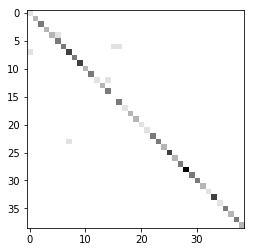

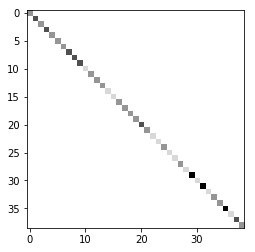

In [46]:
def printModelMetrics(accuracy, confusion_matrix):
    print('Acurácia:', accuracy)
    print('Matrix de confusao:')
    plt.figure()
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Greys)
    print('=====')

print('Modelo treinado de forma direta:')
printModelMetrics(direct_model_accuracy, direct_model_confusion)

print('Modelo treinado com kfold:')
printModelMetrics(kfold_model_accuracy, kfold_model_confusion)

## Questões

### 1. O classificador escolhido por você obteve um bom desempenho em sua opinião? Por que?

O classificador obteve desempenho superior a 90% em ambas as situações (forma direta e kfold). O desempenho alto se deve ao bom desempenho de redes neurais artificiais em problemas de visão computacional, como é o caso.

### 2. Além da acurácia e da matriz de confusão, quais métricas e recursos poderiam ser utilizados para avaliar o seu classificador?

O F1 score, a revocação e a precisão podem ser utilizados na avaliação de classificadores.

### 3. O seu classificador obteve um desempenho notoriamente superior ou inferior para alguma das classes? Para qual(is)? Por que você acredita que isso ocorreu?

Isso nao foi percebido avaliando as matrizes de confusão dos modelos.

### 4. O que se poderia fazer para melhorar o desempenho de seu classificador?

Refinar os parâmetros de treinamento e a estrutura da rede, tais como o numero de iterações, quantidade de nós internos, quantidade de camadas internas, bem como os parâmetros que definem o treino, como a porcentagem de divisão dos dados em treino e teste, ou o numero de "splits" do KFold.

### 5. Se fosse utilizada apenas metade da base de dados deste exercício em vez de ela toda, mas mantendo as proporções para os dados de treinamento e teste, os resultados sofreriam alguma mudança significativa? Se sim, quais e em qual intensidade?

Provavelmente sim, uma vez que o model teria menos dados para ser treinado. Assim, o desempenho provavelmente seria inferior.

### 6. Para quê servem métodos como k-Fold e Bootstrap? Você observou alguma mudança significativa por conta de sua utilização? Se sim, qual? E a quê se deve isso?

Os métodos servem para aumentar a performance de um modelo preditor/classificador. No caso, foi percebido um aumento na performance do preditor ao usar o KFold, visualizado através de um valor de acurácia maior. Isso se deve à maior quantidade de iterações de treino feita pelo modelo.

## Referências

[Scikit-Learn - Datasets - Olivetti Faces](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

[Scikit-Learn - Resample (Bootstrap)](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)